In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df = pd.DataFrame.from_records([ json.loads(l) for l in open("../sum.json") ])
df["rate"] = df["length"] / df["time"]

In [59]:
df

,arch,count,host,language,language_ver,length,mem_size,name,os,os_ver,samples,time,timestamp,type
0,x86_64,10,sorrel.local,python,3.5.1,1024,8192,numpy.sum,Darwin,14.5.0,100,0.000003,2016-08-08T15:45:33Z,f64
1,x86_64,10,sorrel.local,python,3.5.1,2048,16384,numpy.sum,Darwin,14.5.0,100,0.000004,2016-08-08T15:45:33Z,f64
2,x86_64,10,sorrel.local,python,3.5.1,4096,32768,numpy.sum,Darwin,14.5.0,100,0.000004,2016-08-08T15:45:33Z,f64
3,x86_64,10,sorrel.local,python,3.5.1,8192,65536,numpy.sum,Darwin,14.5.0,100,0.000006,2016-08-08T15:45:33Z,f64
4,x86_64,1,sorrel.local,python,3.5.1,16384,131072,numpy.sum,Darwin,14.5.0,100,0.000011,2016-08-08T15:45:33Z,f64
5,x86_64,1,sorrel.local,python,3.5.1,32768,262144,numpy.sum,Darwin,14.5.0,100,0.000020,2016-08-08T15:45:33Z,f64
6,x86_64,1,sorrel.local,python,3.5.1,65536,524288,numpy.sum,Darwin,14.5.0,100,0.000036,2016-08-08T15:45:33Z,f64
7,x86_64,1,sorrel.local,python,3.5.1,131072,1048576,numpy.sum,Darwin,14.5.0,100,0.000067,2016-08-08T15:45:33Z,f64
8,x86_64,1,sorrel.local,python,3.5.1,262144,2097152,numpy.sum,Darwin,14.5.0,100,0.000133,2016-08-08T15:45:33Z,f64
9,x86_64,1,sorrel.local,python,3.5.1,524288,4194304,numpy.sum,Darwin,14.5.0,100,0.000336,2016-08-08T15:45:33Z,f64


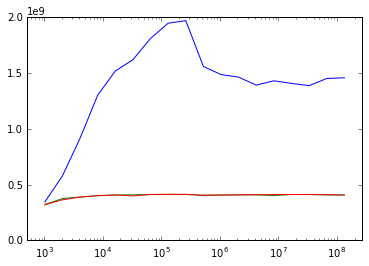

In [61]:
py = df[df["language"] == "python"]
plt.semilogx(py["length"], py["rate"])
js = df[df["language"] == "node.js"]
js0 = js[js["name"] == "sum_loop"]
plt.semilogx(js0["length"], js0["rate"])
js1 = js[js["name"] == "ops.sum"]
plt.semilogx(js1["length"], js1["rate"])
# plt.gcf().set_figwidth(20)

plt.gca().set_xlim(df["length"].min() / 2, df["length"].max() * 2)
plt.gca().set_ylim(0);

In [40]:
df[df["size"] == 1 << 24]

,arch,count,host,language,language_ver,name,os,os_ver,samples,size,time,timestamp,total_size
14,x86_64,1,sorrel.local,python,3.5.1,sum,Darwin,14.5.0,100,16777216,0.012276,2016-08-08T01:54:47Z,16777216


In [63]:
df[df["length"] == 128 * 1024**2]

,arch,count,host,language,language_ver,length,mem_size,name,os,os_ver,samples,time,timestamp,type,rate
17,x86_64,1,sorrel.local,python,3.5.1,134217728,1073741824,numpy.sum,Darwin,14.5.0,100,0.092066,2016-08-08T15:45:57Z,f64,1.457848e+09
52,x64,1,sorrel.local,node.js,6.3.1,134217728,1073741824,sum_loop,Darwin,14.5.0,100,0.328429,2016-08-08T15:48:21.318Z,f64,4.086661e+08
53,x64,1,sorrel.local,node.js,6.3.1,134217728,1073741824,ops.sum,Darwin,14.5.0,100,0.330311,2016-08-08T15:49:09.514Z,f64,4.063381e+08


In [ ]:
]